In [240]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
# untuk menampilkan grafik
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pickle

In [241]:
df = pd.read_csv("./dataset/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Preprocessing

In [242]:
#Check NaN Values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [243]:
#Remove every row that contains NaN value
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [244]:
#Remove unecessary column
df = df.drop('id', axis=1)

In [245]:
#Check all categorical column unique values
df_categorical = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].copy()
for (colName, colData) in df_categorical.iteritems():
  print(df[colName].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [246]:
# Convert categorical values to label
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,0,81.0,1,0,1,2,0,80.43,29.7,2,1
11,0,61.0,0,1,1,0,0,120.46,36.8,3,1


In [247]:
df["stroke"].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [248]:
df = df.sort_values(by=['stroke'], ascending=False)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
192,1,59.0,0,0,1,3,0,118.03,35.5,3,1
158,0,71.0,0,0,1,3,1,195.71,34.1,1,1
159,0,81.0,1,0,1,3,0,74.02,25.0,2,1
163,0,78.0,1,0,0,2,1,203.87,45.7,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1873,0,61.0,0,0,1,2,0,194.53,45.0,2,0
1872,0,56.0,0,0,1,3,0,94.71,29.6,3,0
1871,1,56.0,1,0,1,0,1,72.79,23.8,3,0
1870,0,53.0,0,0,1,3,1,113.74,31.6,3,0


In [249]:
df = df.iloc[:1000]
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
192,1,59.0,0,0,1,3,0,118.03,35.5,3,1
158,0,71.0,0,0,1,3,1,195.71,34.1,1,1
159,0,81.0,1,0,1,3,0,74.02,25.0,2,1
163,0,78.0,1,0,0,2,1,203.87,45.7,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2687,0,2.0,0,0,0,4,0,100.66,18.5,0,0
2686,1,54.0,0,0,1,2,0,227.74,33.4,3,0
2702,0,42.0,0,0,1,2,0,94.38,34.0,2,0
2703,0,26.0,0,0,0,2,1,100.31,38.6,2,0


In [250]:
df["stroke"].value_counts()

0    791
1    209
Name: stroke, dtype: int64

In [251]:
df = df.sample(frac=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2737,1,55.0,0,0,1,3,0,163.82,27.5,2,0
2956,0,5.0,0,0,0,4,0,59.78,15.9,0,0
3657,1,4.0,0,0,0,4,0,100.19,18.7,0,0
3738,0,54.0,0,0,1,2,0,94.11,28.6,1,0
3362,1,56.0,0,0,1,2,0,96.84,30.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3589,1,30.0,0,0,1,2,1,96.02,29.8,2,0
152,0,80.0,0,0,1,3,1,76.57,34.1,2,1
3587,0,72.0,1,1,1,2,1,198.32,31.3,1,0
3744,1,15.0,0,0,0,2,0,122.25,21.0,2,0


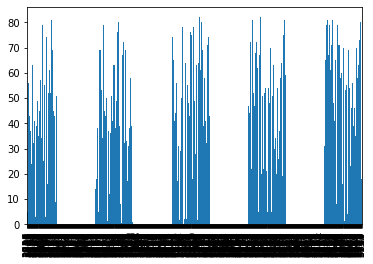

In [252]:

df['age'].plot(kind = 'bar')

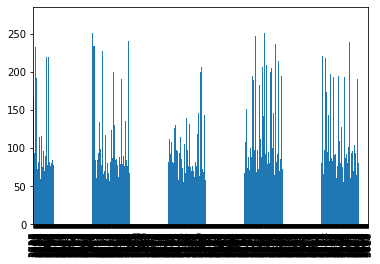

In [253]:
df['avg_glucose_level'].plot(kind = 'bar')

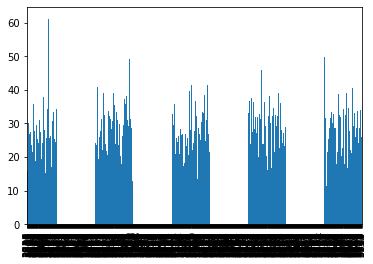

In [254]:
df['bmi'].plot(kind = 'bar')

In [255]:
# df["age"] = MinMaxScaler().fit_transform(np.array(df["age"]).reshape(-1,1))
# df["avg_glucose_level"] = MinMaxScaler().fit_transform(np.array(df["avg_glucose_level"]).reshape(-1,1))
# df["bmi"] = MinMaxScaler().fit_transform(np.array(df["bmi"]).reshape(-1,1))
# df

# SVM Model

In [256]:
# Split the features and target class
y = df['stroke'].copy()
X = df.drop('stroke', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [257]:
def fit_and_pred():
    classifier = svm.SVC(kernel='linear', probability=True)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # print(f"PROBA : {classifier.predict_proba(X_test).max()[:10]}")
    
    print(classification_report(y_test, y_pred))

    return classifier

classifier = fit_and_pred()

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



/Users/aisha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [258]:
pickle.dump(classifier, open('model.pkl', 'wb'))

In [259]:
classifier_from_pickle = pickle.load(open('model.pkl', 'rb'))

y_pred = classifier_from_pickle.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



/Users/aisha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
